In [1]:
import pandas as pd

df = pd.read_csv('train_clean.csv')

C:\Temp\ipykernel_14896\696036150.py:3: DtypeWarning: Columns (14,19,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train_clean.csv')


In [2]:
# Display the count of missing values (NAs) for each column in the dataframe
print(df.isna().sum())
df = df.dropna(subset=['applicant_ethnicity-1', 'co-applicant_ethnicity-1', 'applicant_race-1', 'co-applicant_race-1'])
df = df.fillna('Missing')

action_taken                                     0
purchaser_type                                   0
loan_type                                        0
loan_purpose                                     0
lien_status                                      0
loan_amount                                      0
loan_to_value_ratio                         816735
interest_rate                                    0
rate_spread                                      0
total_loan_costs                                 0
total_points_and_fees                            0
origination_charges                              0
discount_points                                  0
loan_term                                        0
property_value                                   0
construction_method                              0
occupancy_type                                   0
manufactured_home_secured_property_type          0
manufactured_home_land_property_interest         0
total_units                    

In [3]:
print(df['action_taken'].unique())
action_taken_mapping = {
    1: "Loan originated",
    2: "Application approved but not accepted",
    3: "Application denied",
    7: "Preapproval request denied",
    8: "Preapproval request approved but not accepted"
}

df['action_taken'] = df['action_taken'].map(action_taken_mapping)

[1 3 8 7 2]


In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [5]:
X = df.drop(columns=['action_taken'])  # Dropping non-relevant columns
Y = df['action_taken']  # Target variable

In [6]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=69 , shuffle=True)

In [7]:
print("X_Test Shape = " , x_test.shape)
print("Y_Test Shape = " , y_test.shape)
print("X_Train Shape = " , x_train.shape)
print("Y_Train Shape = " , y_train.shape)

X_Test Shape =  (1644176, 36)
Y_Test Shape =  (1644176,)
X_Train Shape =  (6576701, 36)
Y_Train Shape =  (6576701,)


In [8]:
%pip install catboost lightgbm
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Initialize classifiers with moderate complexity
cls1 = GradientBoostingClassifier(n_estimators=10)
cls2 = LGBMClassifier(n_estimators=10)
cls3 = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
cls4 = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
cls5 = XGBClassifier(n_estimators=10, max_depth=6, eval_metric='logloss')
cls6 = RandomForestClassifier(n_estimators=10)
cls7 = ExtraTreesClassifier(n_estimators=10)
cls8 = DecisionTreeClassifier()
cls9 = CatBoostClassifier(logging_level='Silent', n_estimators=10)

# Fit the classifiers
cls1.fit(x_train, y_train)
cls2.fit(x_train, y_train)
cls3.fit(x_train, y_train)
cls4.fit(x_train, y_train)
cls5.fit(x_train, y_train)
cls6.fit(x_train, y_train)
cls7.fit(x_train, y_train)
cls8.fit(x_train, y_train)
cls9.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.384915 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2857
[LightGBM] [Info] Number of data points in the train set: 6576701, number of used features: 36
[LightGBM] [Info] Start training from score -3.283618
[LightGBM] [Info] Start training from score -1.418379
[LightGBM] [Info] Start training from score -0.368248
[LightGBM] [Info] Start training from score -3.870345
[LightGBM] [Info] Start training from score -4.879006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


d:\Jupyter\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [10]:
# Predict results for each classifier
pred1 = cls1.predict(x_test)
pred2 = cls2.predict(x_test)
pred3 = cls3.predict(x_test)
pred4 = cls4.predict(x_test)
pred5 = cls5.predict(x_test)
pred6 = cls6.predict(x_test)
pred7 = cls7.predict(x_test)
pred8 = cls8.predict(x_test)
pred9 = cls9.predict(x_test)

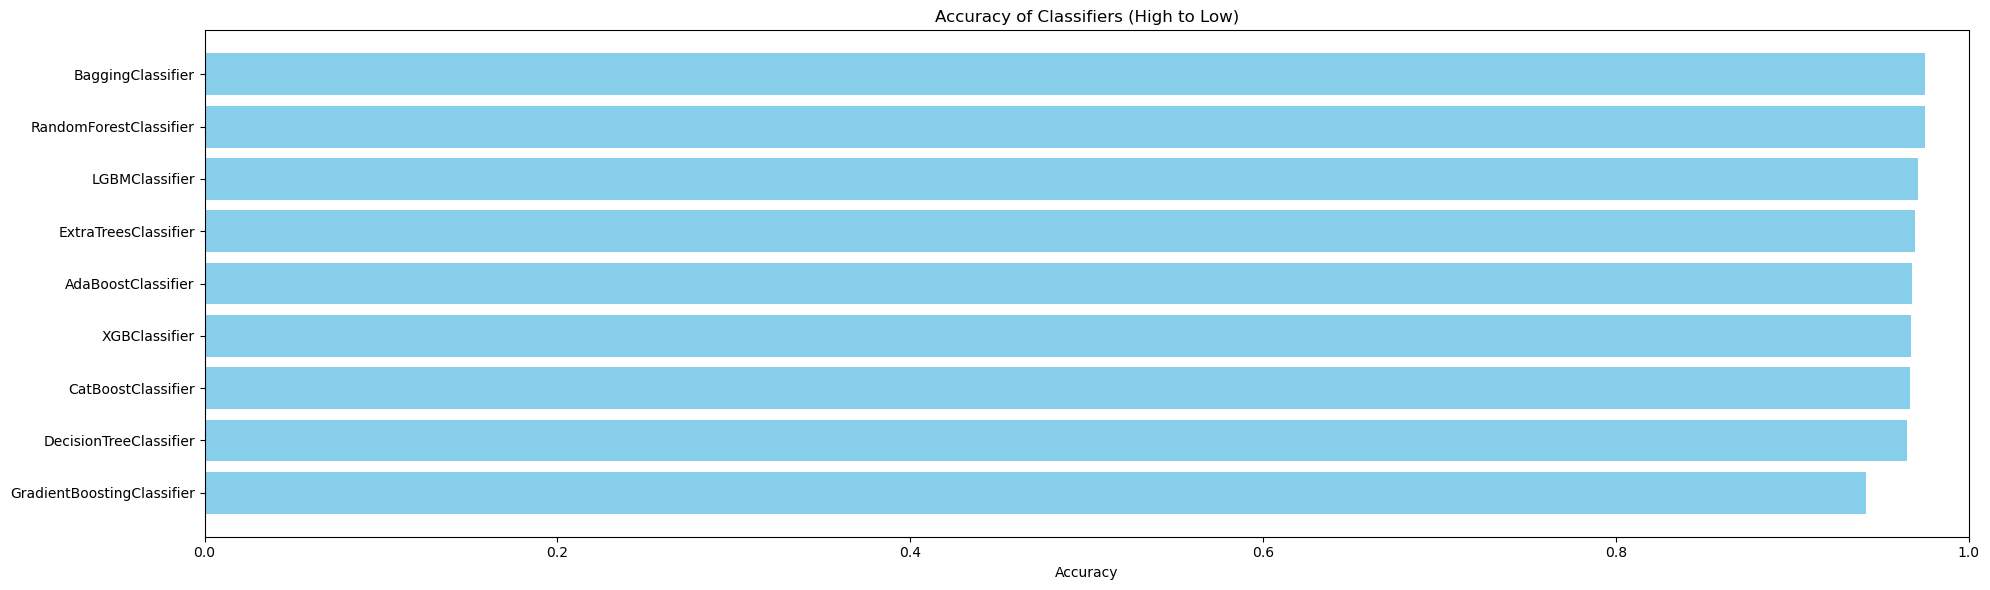

In [11]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot as plt

# Calculate accuracy for each classifier
acc_values = [
    accuracy_score(y_test, pred1),
    accuracy_score(y_test, pred2),
    accuracy_score(y_test, pred3),
    accuracy_score(y_test, pred4),
    accuracy_score(y_test, pred5),
    accuracy_score(y_test, pred6),
    accuracy_score(y_test, pred7),
    accuracy_score(y_test, pred8),
    accuracy_score(y_test, pred9)
]

classifier_names = [
    'GradientBoostingClassifier',
    'LGBMClassifier',
    'BaggingClassifier',
    'AdaBoostClassifier',
    'XGBClassifier',
    'RandomForestClassifier',
    'ExtraTreesClassifier',
    'DecisionTreeClassifier',
    'CatBoostClassifier'
]

# Sort accuracy values in descending order (high to low)
acc_sorted_indices = np.argsort(acc_values)[::-1]
acc_values_sorted = np.array(acc_values)[acc_sorted_indices]
classifier_names_acc_sorted = np.array(classifier_names)[acc_sorted_indices]

# Create a figure with a single subplot
plt.figure(figsize=(20, 6))

# Plot accuracy values (high to low)
plt.barh(classifier_names_acc_sorted, acc_values_sorted, color='skyblue')
plt.title('Accuracy of Classifiers (High to Low)')
plt.xlabel('Accuracy')
plt.xlim(0, 1)  # Assuming accuracy ranges from 0 to 1
plt.gca().invert_yaxis()  # Best performance on top

# Display the plot
plt.tight_layout()
plt.show()

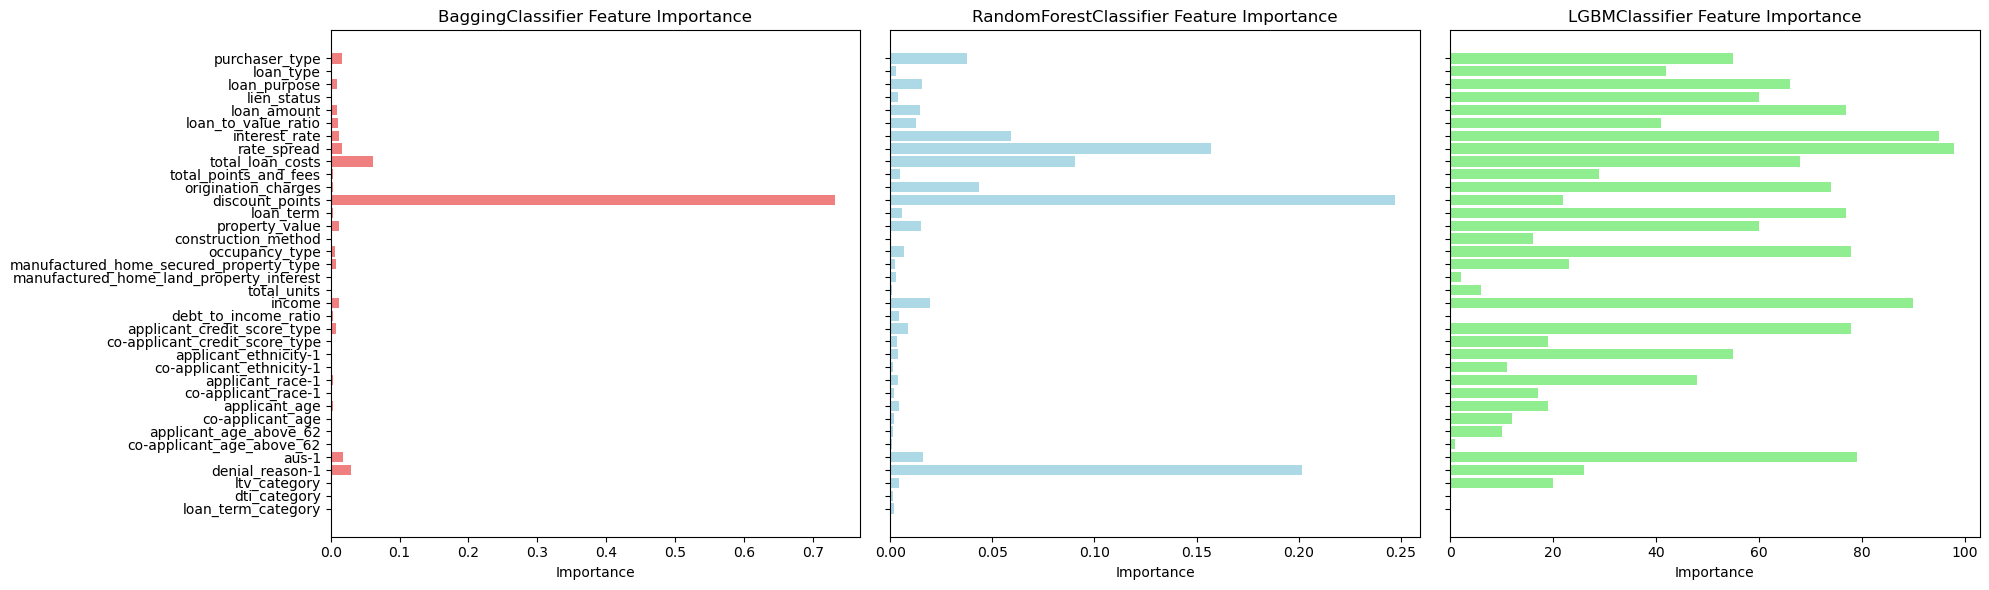

In [12]:
# Extract feature importances
import numpy as np

# For BaggingClassifier, average feature importances from all fitted base estimators
bagging_importances = np.mean([tree.feature_importances_ for tree in cls3.estimators_], axis=0)
random_forest_importances = cls6.feature_importances_
lgbm_importances = cls2.feature_importances_

# Create subplots for the three classifiers
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# BaggingClassifier feature importance
axes[0].barh(X.columns, bagging_importances, color='lightcoral')
axes[0].set_title('BaggingClassifier Feature Importance')
axes[0].set_xlabel('Importance')
axes[0].invert_yaxis()

# RandomForestClassifier feature importance
axes[1].barh(X.columns, random_forest_importances, color='lightblue')
axes[1].set_title('RandomForestClassifier Feature Importance')
axes[1].set_xlabel('Importance')

# LGBMClassifier feature importance
axes[2].barh(X.columns, lgbm_importances, color='lightgreen')
axes[2].set_title('LGBMClassifier Feature Importance')
axes[2].set_xlabel('Importance')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [13]:
# Export the LGBM model as text formula
lgbm_booster = cls2.booster_
lgbm_rules = lgbm_booster.dump_model()['tree_info']
print("Number of trees in LGBM model:", len(lgbm_rules))
print("First tree structure:")
print(lgbm_booster.dump_model()['tree_info'][0])

Number of trees in LGBM model: 50
First tree structure:
{'tree_index': 0, 'num_leaves': 31, 'num_cat': 0, 'shrinkage': 1, 'tree_structure': {'split_index': 0, 'split_feature': 0, 'split_gain': 132155, 'threshold': 1.0000000180025095e-35, 'decision_type': '<=', 'default_left': True, 'missing_type': 'None', 'internal_value': -3.28362, 'internal_weight': 296664, 'internal_count': 6576701, 'left_child': {'split_index': 1, 'split_feature': 8, 'split_gain': 343851, 'threshold': 3368.3700000000003, 'decision_type': '<=', 'default_left': True, 'missing_type': 'None', 'internal_value': -3.23002, 'internal_weight': 180361, 'internal_count': 3998405, 'left_child': {'leaf_index': 0, 'leaf_value': -3.3667344875272716, 'leaf_weight': 91074.83747720718, 'leaf_count': 2019024}, 'right_child': {'split_index': 2, 'split_feature': 8, 'split_gain': 189400, 'threshold': 3375.5600000000004, 'decision_type': '<=', 'default_left': True, 'missing_type': 'None', 'internal_value': -3.09057, 'internal_weight': 89

In [16]:
lgbm_booster.save_model('lgbm.txt')

In [18]:
lgbm_booster.predict('input_data.csv')

[LightGBM] [Warning] Data file input_data.csv only has one line.
[LightGBM] [Info] Data file input_data.csv doesn't contain a label column.


array([0.00848306, 0.04916649, 0.93584772, 0.00474974, 0.00175299])